<a href="https://colab.research.google.com/github/mananpatel126/ENEL-645-Group-13/blob/main/Project/Train_the__model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the necessary libraries for the project.
import numpy as np
import cv2
import os
import keras
import matplotlib
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Activation


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Defining the path to directory of the data set.
train_path = r'/content/drive/MyDrive/Google colab/Final Project ENEL 645/Project/Data/train'
validation_path = r'/content/drive/MyDrive/Google colab/Final Project ENEL 645/Project/Data/validation'
test_path = r'/content/drive/MyDrive/Google colab/Final Project ENEL 645/Project/Data/test'

gen_params = {"featurewise_center":False,\
              "samplewise_center":False,\
              "featurewise_std_normalization":False,\
              "samplewise_std_normalization":False,\
              "zca_whitening":False,\
              "rotation_range":45,\
              "width_shift_range":0.1,\
              "height_shift_range":0.1,\
              "shear_range":0.1, \
              "zoom_range": [1.5,1.5],\
              "horizontal_flip":True,\
              "vertical_flip":False\
               }
train_batches = ImageDataGenerator(**gen_params, preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), class_mode='categorical', batch_size=120, interpolation="nearest",shuffle=True)
validation_batches = ImageDataGenerator(**gen_params, preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=validation_path, target_size=(224,224), class_mode='categorical', batch_size=120, interpolation="nearest",shuffle=True)
test_batches = ImageDataGenerator(**gen_params, preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path,  target_size=(224,224),  class_mode='categorical',  batch_size=60, interpolation="nearest", shuffle=True)


Found 8000 images belonging to 4 classes.
Found 1240 images belonging to 4 classes.
Found 1240 images belonging to 4 classes.


Actual label on a small set of train data--



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

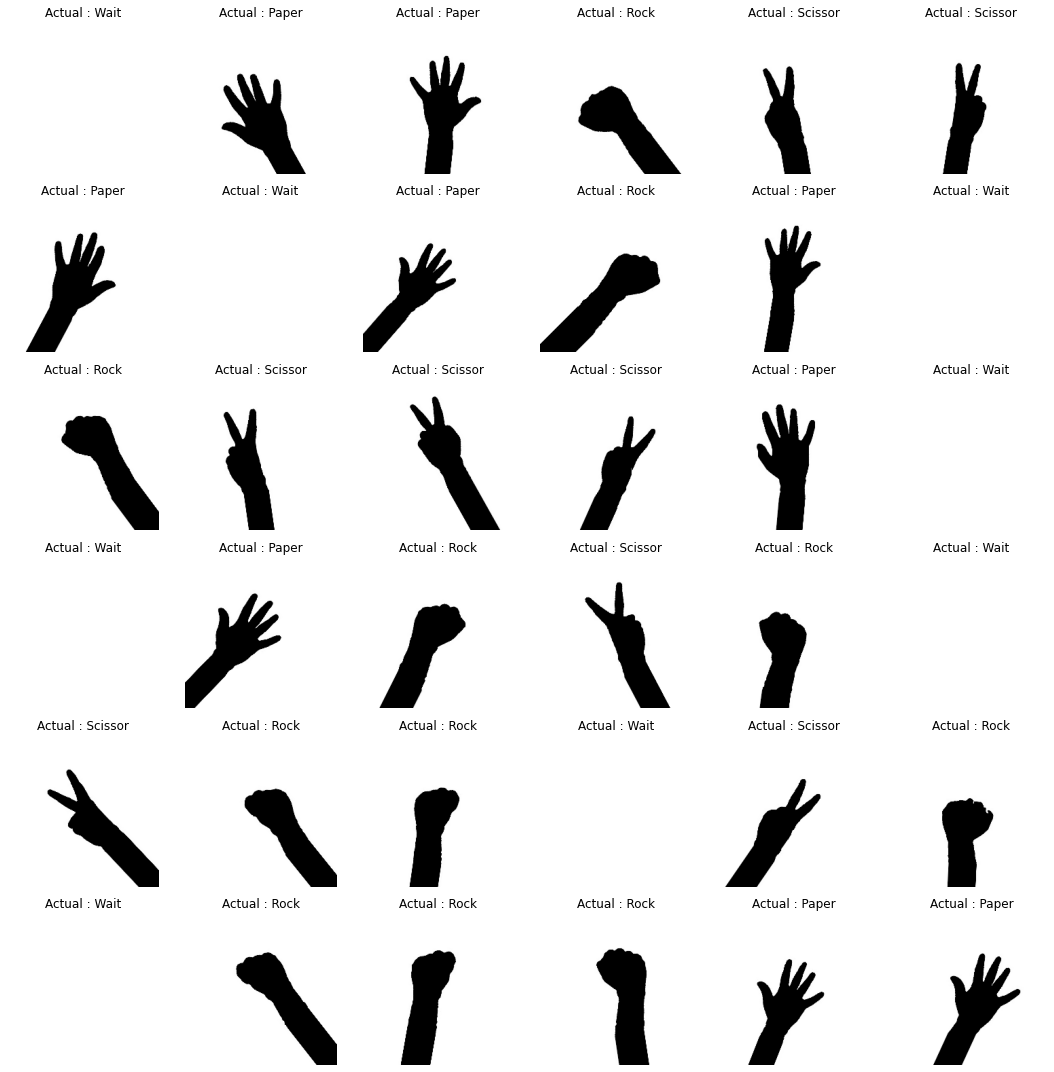

In [ ]:
# Defining the label to the dataset
word_dict = {0:'Paper',1:'Rock',2:'Scissor',3:'Wait'}

# Getting a set of train batch from the dataset
imgs, labels = next(train_batches)

print("Actual label on a small set of train data--")
print("")

fig, axes = plt.subplots(6, 6, figsize=(15,15))
axes = axes.flatten()
count = 0

for img, ax in zip( imgs, axes):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title("Actual : %s" %(word_dict[np.argmax(labels[count])] ))  #label[count]
    count = count + 1
plt.tight_layout()
plt.show()

In [ ]:
model_name = "/content/drive/MyDrive/Google colab/Final Project ENEL 645/Project/TR_Test5.h5"

In [ ]:
base_model = tf.keras.applications.MobileNet(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False) 
base_model.trainable = False   # Keeping the initial layer freeze from the training.

17235968/17225924 [==============================] - 0s 0us/step


In [ ]:
x1 = base_model(base_model.input, training = False)   # Keeping the CNN mode layer freeze.
x2 = tf.keras.layers.Flatten()(x1)   # Flattening the data.
x3 = tf.keras.layers.Dense(10,activation = 'relu')(x2)
out = tf.keras.layers.Dense(4,activation = 'softmax')(x3)   # Defining the output layer for 4 class.
model = tf.keras.Model(inputs = base_model.input, outputs =out)

# Printing the model summary.
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 10)                501770    
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 3,730,678
Trainable params: 501,814
Non-trainable params: 3,228,864
_____________________________________________

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])   # Using SGD optimizer
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.00005)   # Reducing the learning rate by 80 %.
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='min')   # Callback for early stop.

In [ ]:
# Fine Tuning...
history = model.fit(train_batches, epochs=20, verbose = 1, callbacks=[reduce_lr, early_stop],  validation_data = validation_batches)

Epoch 1/20
67/67 [==============================] - 1262s 19s/step - loss: 0.1608 - accuracy: 0.9610 - val_loss: 0.0357 - val_accuracy: 0.9952 - lr: 0.0010
Epoch 2/20
67/67 [==============================] - 147s 2s/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0299 - val_accuracy: 0.9927 - lr: 0.0010
Epoch 3/20
67/67 [==============================] - 146s 2s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0357 - val_accuracy: 0.9887 - lr: 0.0010
Epoch 4/20
67/67 [==============================] - 146s 2s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0209 - val_accuracy: 0.9935 - lr: 2.0000e-04
Epoch 5/20
67/67 [==============================] - 145s 2s/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0216 - val_accuracy: 0.9927 - lr: 2.0000e-04
Epoch 6/20
67/67 [==============================] - 144s 2s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 0.9935 - lr: 5.0000e-05


In [ ]:
model.save('/content/drive/MyDrive/Google colab/Final Project ENEL 645/Project/TR_Test5.h5')  # Saving the model

In [ ]:
model = tf.keras.models.load_model(model_name)
model.trainable = True  # Training the whole model for fine tuning

model.compile(optimizer=SGD(learning_rate=0.00000001), loss='categorical_crossentropy', metrics=['accuracy'])   # Using SGD model optimizer
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.00005)   # Learning rate reduction by 80%
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='min')  # Early stop callback

# Model Summary
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 10)                501770    
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 3,730,678
Trainable params: 3,708,790
Non-trainable params: 21,888
______________________________________________

In [ ]:
history = model.fit(train_batches, epochs=10, verbose = 1, callbacks=[reduce_lr, early_stop],  validation_data = validation_batches)

Epoch 1/10
67/67 [==============================] - 173s 3s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0253 - val_accuracy: 0.9927 - lr: 1.0000e-08
Epoch 2/10
67/67 [==============================] - 165s 2s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0211 - val_accuracy: 0.9952 - lr: 1.0000e-08
Epoch 3/10
67/67 [==============================] - 165s 2s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0227 - val_accuracy: 0.9927 - lr: 1.0000e-08
Epoch 4/10
67/67 [==============================] - 171s 3s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0267 - val_accuracy: 0.9935 - lr: 1.0000e-08


In [ ]:
model.save('/content/drive/MyDrive/Google colab/Final Project ENEL 645/Project/TR_Test6.h5')
model = keras.models.load_model('/content/drive/MyDrive/Google colab/Final Project ENEL 645/Project/TR_Test6.h5')

In [ ]:
# For getting next batch of testing imgs...
imgs, labels = next(test_batches)

predictions = model.predict(imgs, verbose=0)

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

loss of 0.00369879137724638; accuracy of 100.0%


predictions on a small set of test data--



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

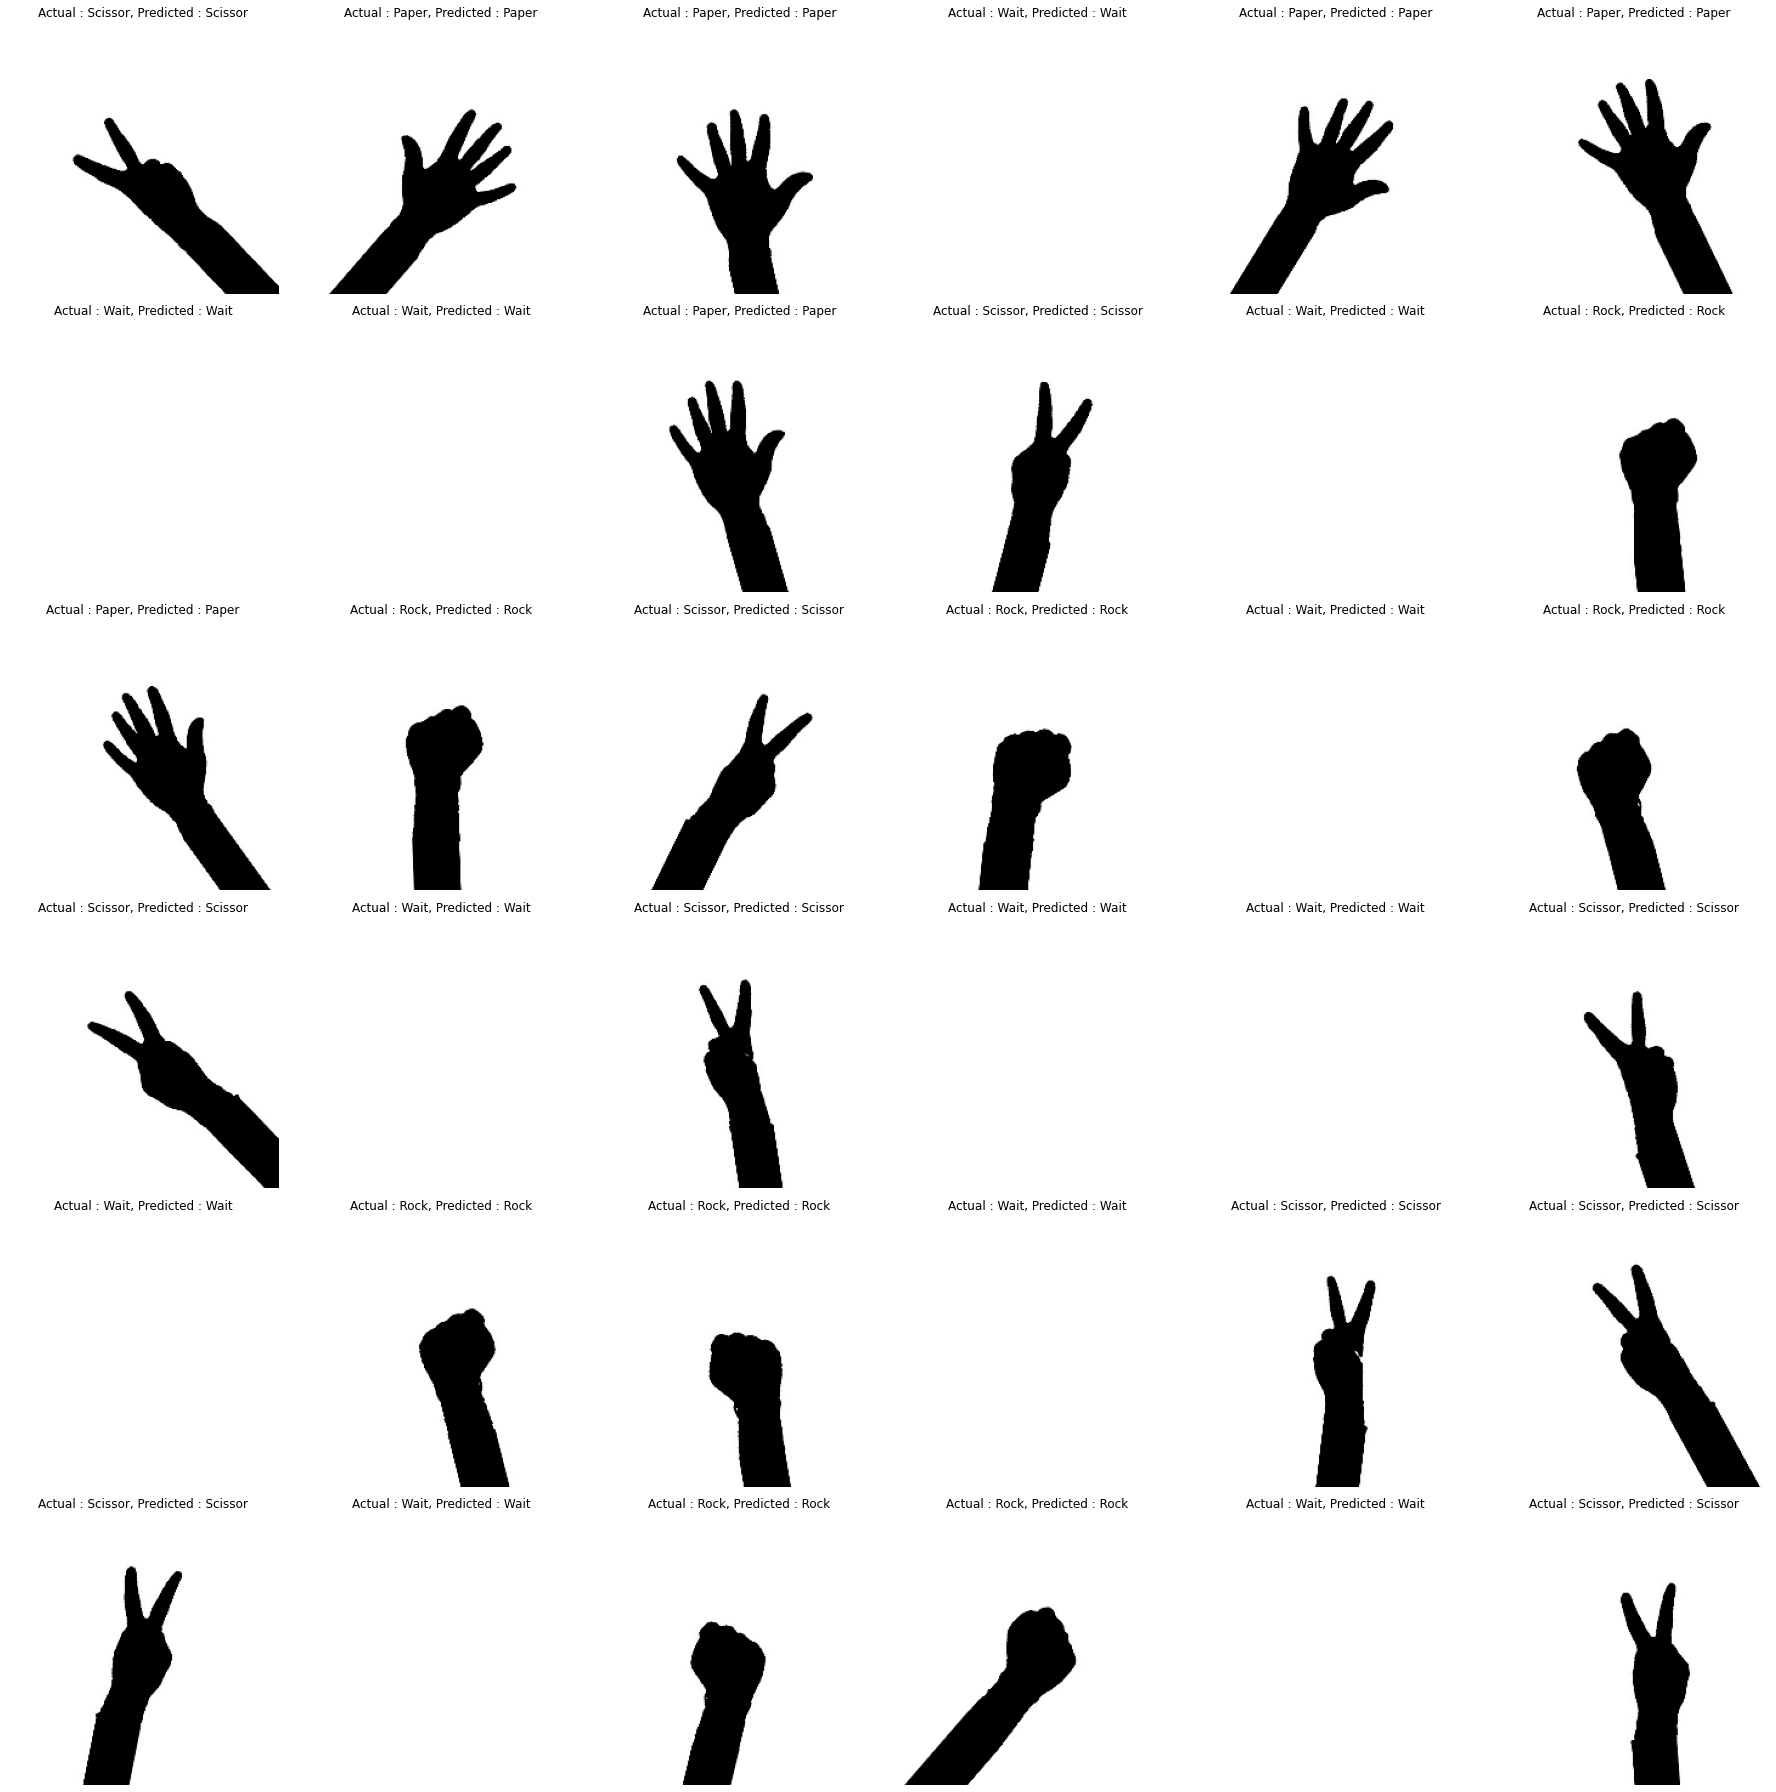

In [ ]:
#Defining the lables for the output.
word_dict = {0:'Paper',1:'Rock',2:'Scissor',3:'Wait'}

#Getting the test batch for the prediction.
imgs, labels = next(test_batches)

# Output prediction
predictions = model.predict(imgs, verbose=0)

print("predictions on a small set of test data--")
print("")

fig, axes = plt.subplots(6, 6, figsize=(25,25))
axes = axes.flatten()
count = 0
i = np.array(predictions)
for img, ax in zip( imgs, axes):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title("Actual : %s, Predicted : %s" %(word_dict[np.argmax(labels[count])], word_dict[np.argmax(i[count])]))  #label[count]
    count = count + 1
plt.tight_layout()
plt.show()

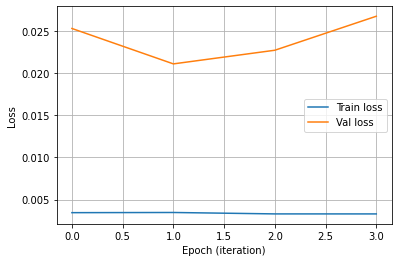

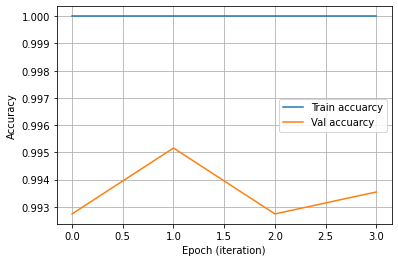

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# history = model
# acc = history.history['loss'] 
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()